In [26]:
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'retina'

plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["image.cmap"] = "viridis"
import pandas as pd

In [28]:
df = pd.read_csv("video_games_sales.csv").dropna()
print(df.shape)

(6825, 16)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [30]:
df["User_Score"] = df["User_Score"].astype("float64")

In [31]:
df["Year_of_Release"] = df["Year_of_Release"].astype("int64")

In [32]:
df["User_Count"] = df["User_Count"].astype("int64")

In [33]:
df["Critic_Count"] = df["Critic_Count"].astype("int64")

In [34]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,8.0,192,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65,8.5,431,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41,6.6,129,Nintendo,E


In [35]:
useful_cols = [
    "Name",
    "Platform",
    "Year_of_Release",
    "Genre",
    "Global_Sales",
    "Critic_Score",
    "Critic_Count",
    "User_Score",
    "User_Count",
    "Rating",
]

df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


In [36]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby("Year_of_Release").head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_of_Release
0,41.36,28.96,3.77,8.45,82.53,2006
2,15.68,12.76,3.79,3.29,35.52,2008
3,15.61,10.93,3.28,2.95,32.77,2009
6,11.28,9.14,6.50,2.88,29.80,2006
7,13.96,9.18,2.93,2.84,28.92,2006
...,...,...,...,...,...,...
1160,0.01,1.58,0.00,0.00,1.59,1996
1567,0.39,0.26,0.53,0.08,1.27,1994
14472,0.00,0.03,0.00,0.01,0.03,1985
14612,0.02,0.00,0.00,0.00,0.03,1992


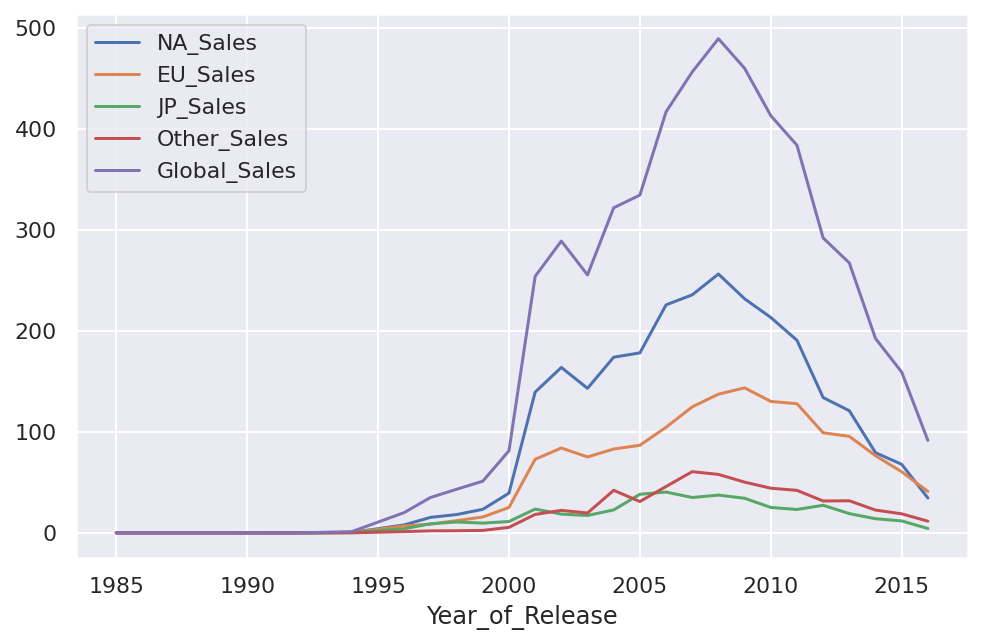

In [37]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby("Year_of_Release").sum().plot()

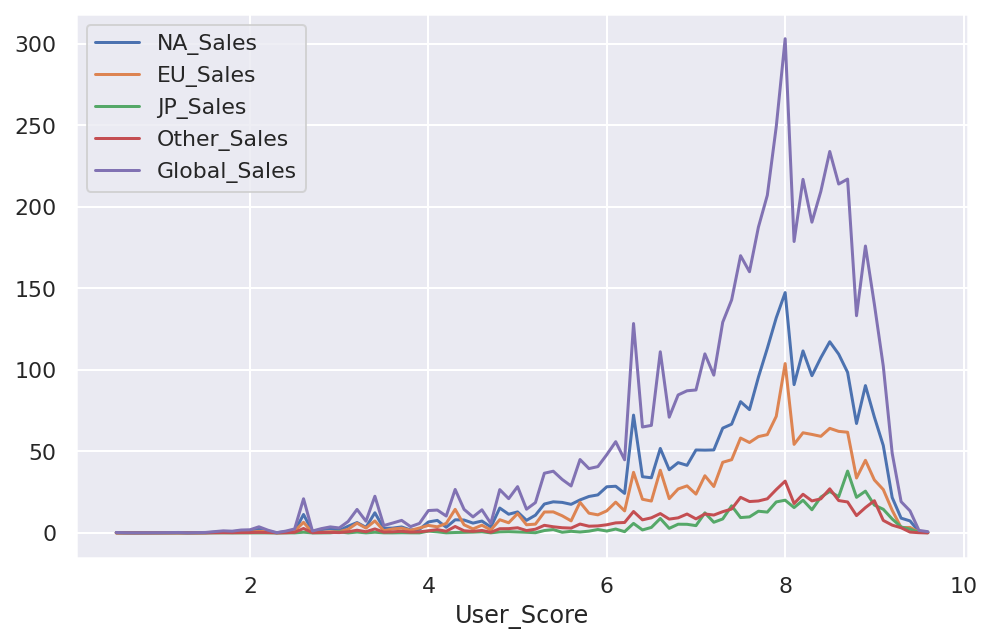

In [39]:
df[[x for x in df.columns if "Sales" in x] + ["User_Score"]].groupby("User_Score").sum().plot()

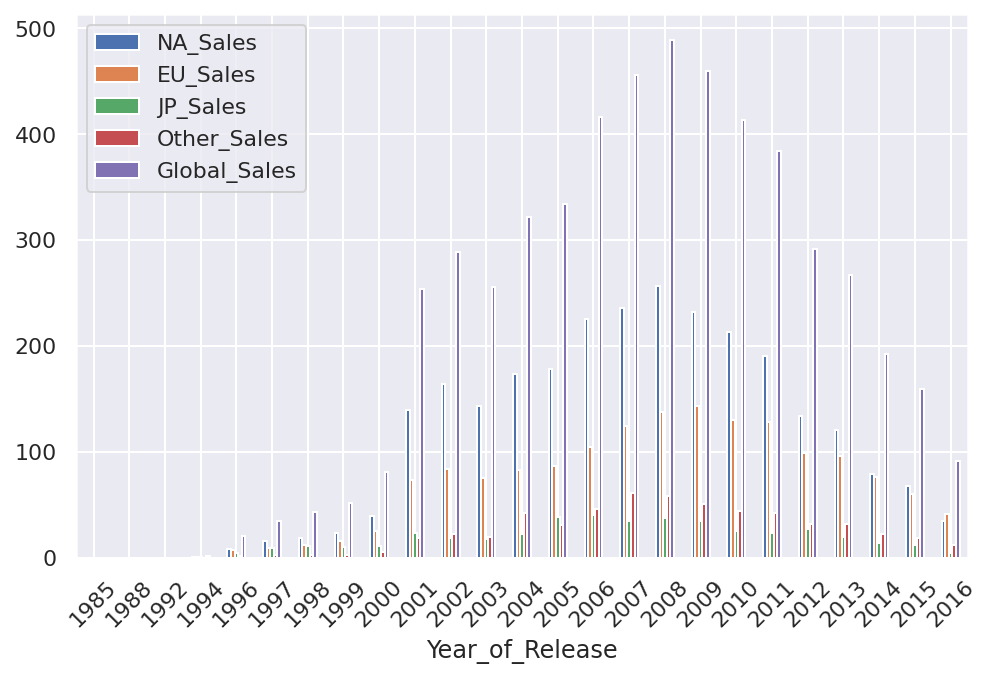

In [40]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby("Year_of_Release").sum().plot(kind="bar", rot=45)

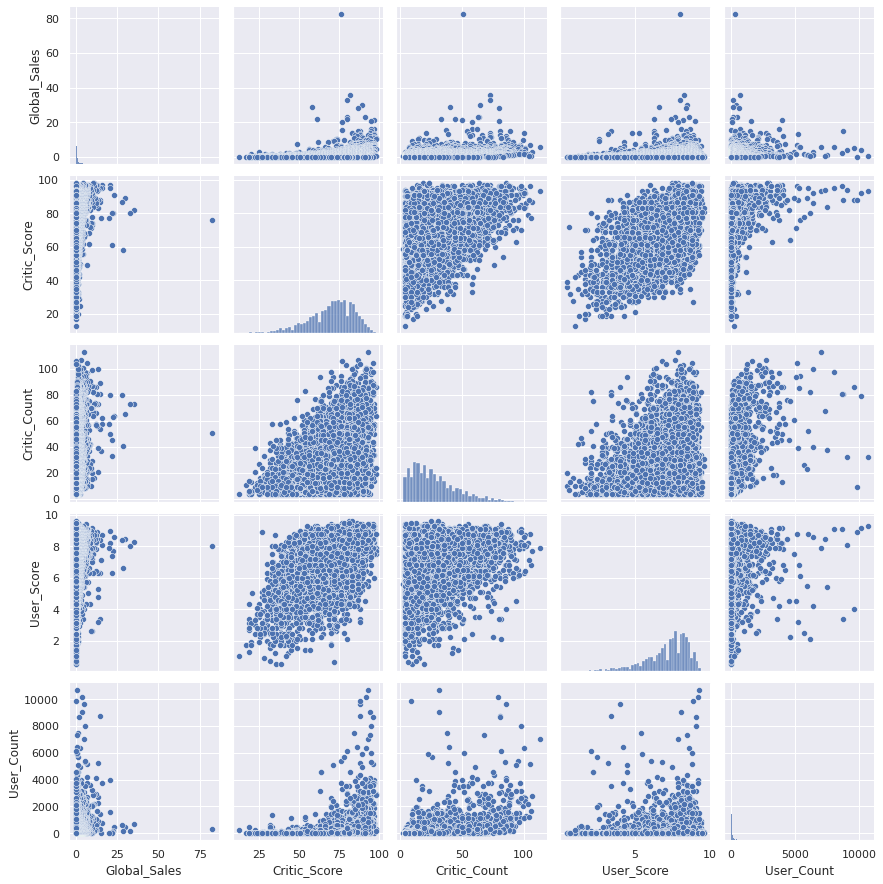

In [41]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[["Global_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count"]])

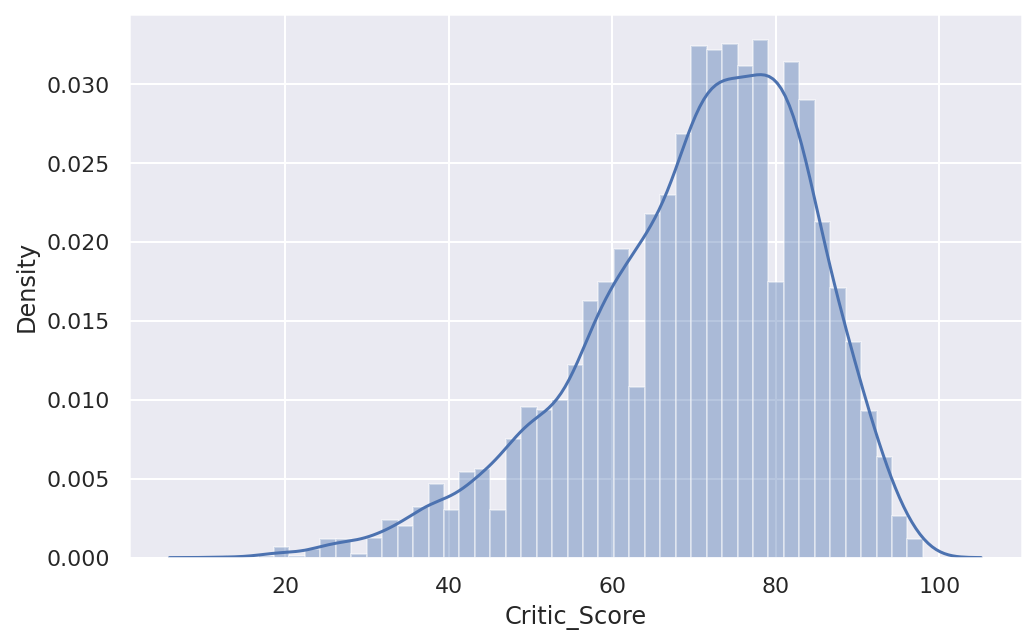

In [42]:
%config InlineBackend.figure_format = 'retina'
sns.distplot(df["Critic_Score"])

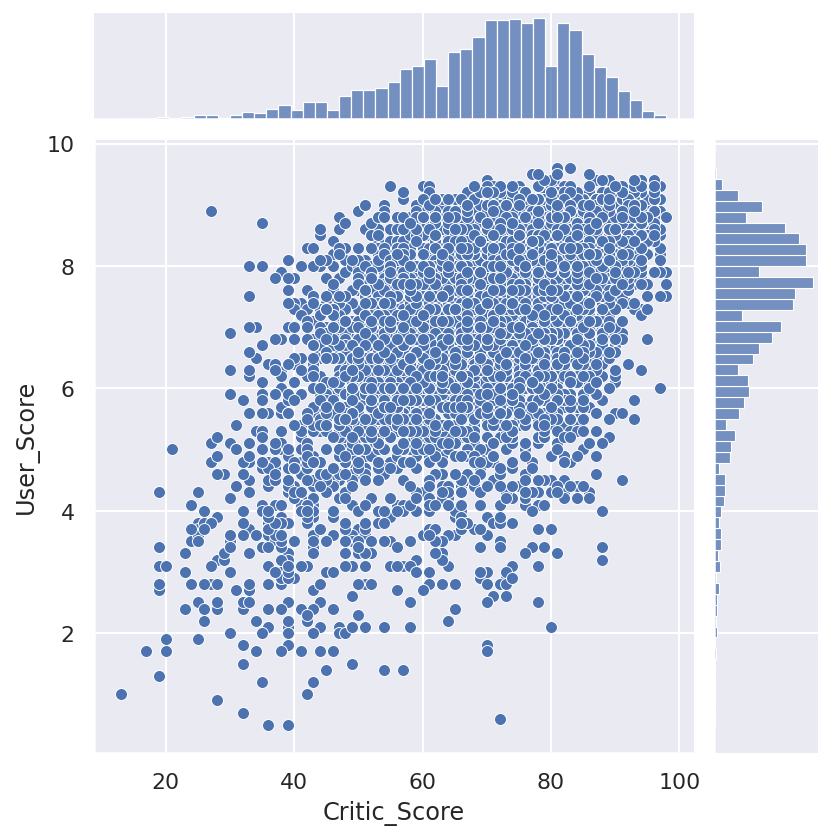

In [43]:
sns.jointplot(x="Critic_Score", y="User_Score", data=df, kind="scatter")

In [44]:
top_platforms = (df["Platform"].value_counts().sort_values(ascending=False).head(5).index.values)

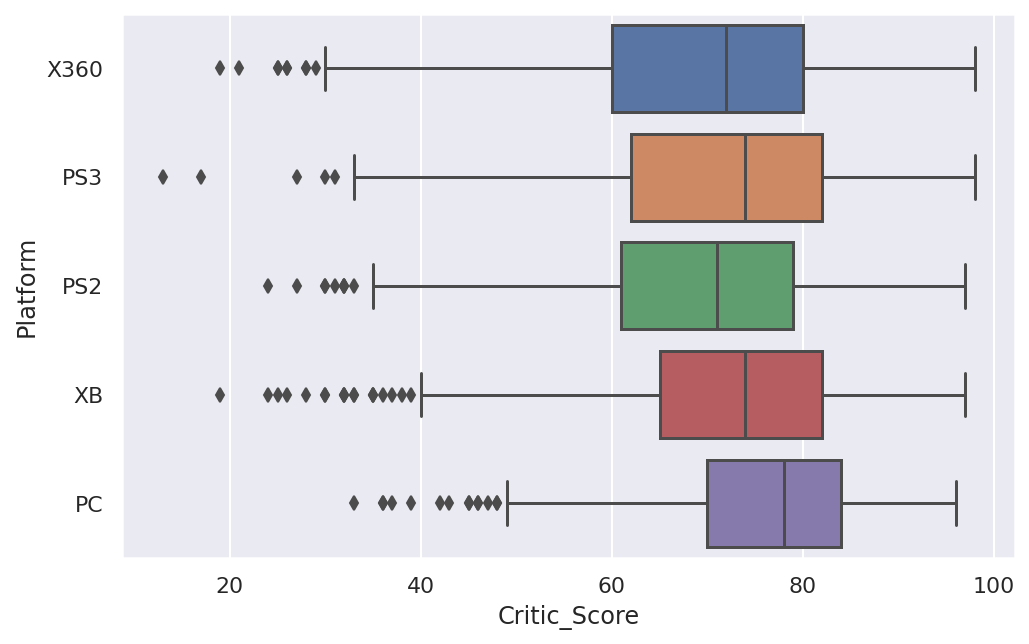

In [45]:
sns.boxplot(y = "Platform", x = "Critic_Score", data=df[df["Platform"].isin(top_platforms)], orient="h")

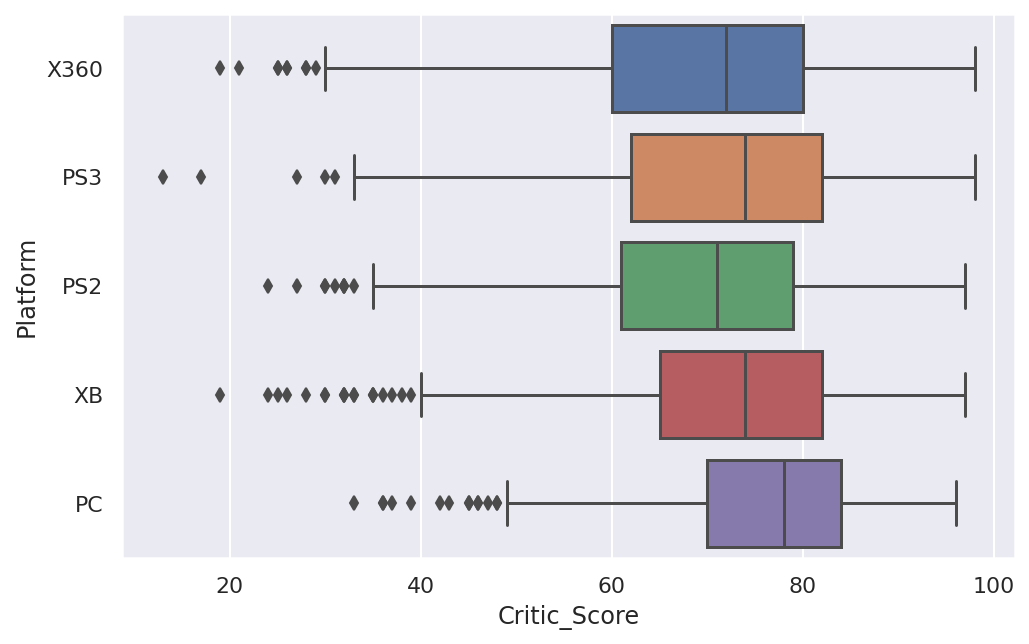

In [47]:
sns.boxplot(y = "Platform", x = "Critic_Score", data=df[df["Platform"].isin(top_platforms)])

In [48]:
platfrom_genre_sales = (df.pivot_table(index = "Platform",
                                       columns="Genre",
                                       values="Global_Sales",
                                       aggfunc=sum).fillna(0).applymap(float))

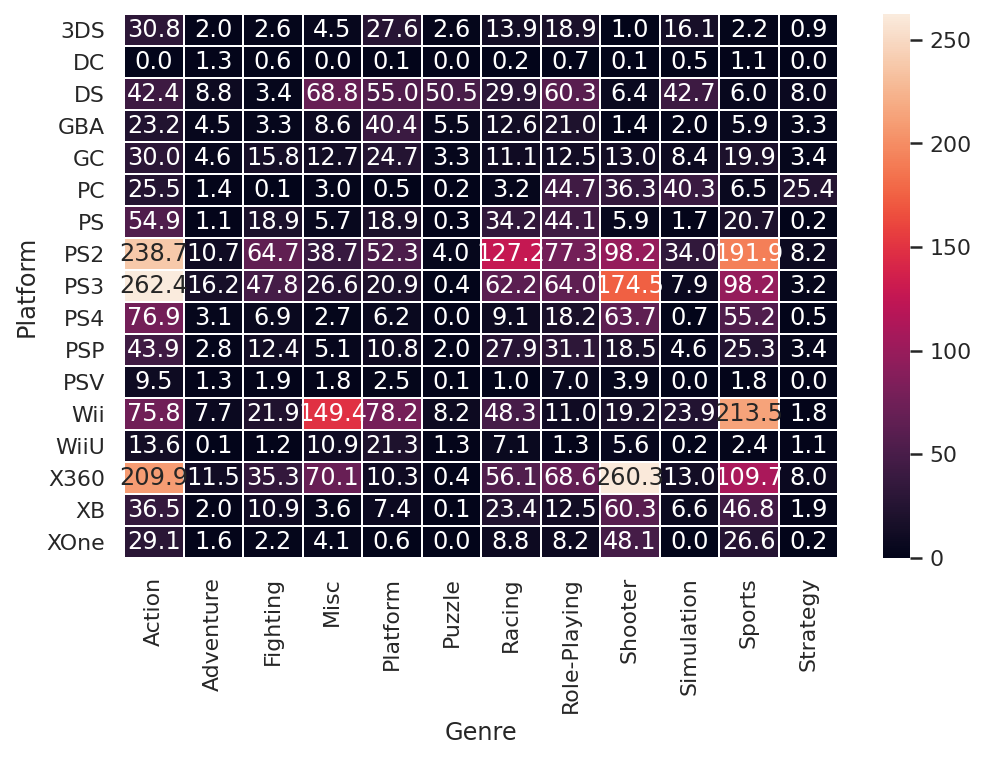

In [49]:
sns.heatmap(platfrom_genre_sales, annot=True, fmt=".1f", linewidths=0.5)

In [62]:
!pip install plotpy

In [53]:
import plotpy
import plotly.graph_objs as go

In [54]:
years_df = (
    df.groupby("Year_of_Release")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Year_of_Release")[["Name"]].count())
)
years_df.columns = ["Global_Sales", "Number_of_Games"]

In [56]:
trace0 = go.Scatter(x=years_df.index, y=years_df["Global_Sales"], name="Global Sales")

In [57]:
trace1 = go.Scatter(x = years_df.index, y=years_df["Number_of_Games"], name="Number of games released")

In [58]:
data = [trace0, trace1]

In [59]:
layout = {"title": "Statistics for video games"}

In [60]:
fig = go.Figure(data=data, layout=layout)

In [65]:
fig.show()

In [67]:
platforms_df = (
    df.groupby("Platform")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Platform")[["Name"]].count())
)
platforms_df.columns = ["Global_Sales", "Number_of_Games"]
platforms_df.sort_values("Global_Sales", ascending=False, inplace=True)

In [68]:
trace0 = go.Bar(
    x=platforms_df.index, y=platforms_df["Global_Sales"], name="Global Sales"
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df["Number_of_Games"],
    name="Number of games released",
)

data = [trace0, trace1]
layout = {"title": "Market share by gaming platform"}

fig = go.Figure(data=data, layout=layout)
fig.show()

In [72]:
data = []
for genre in df.Genre.unique():
  data.append(go.Box(y=df[df.Genre == genre].Critic_Score, name=genre))

fig = go.Figure(data=data)
fig.show()